<a href="https://colab.research.google.com/github/tejas05in/Time_Series_EDA-using-stock-prices/blob/main/Time_Series_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Time Series EDA**

In [104]:
#install Pandas Data Reader
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [105]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [106]:
df_tesla = pdr.get_data_yahoo('TSLA')

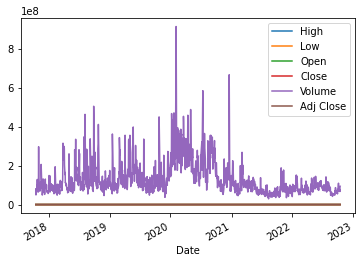

In [107]:
df_tesla.plot()

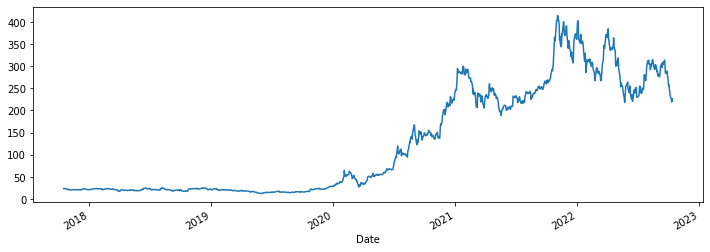

In [108]:
df_tesla['High'].plot(figsize = (12,4))

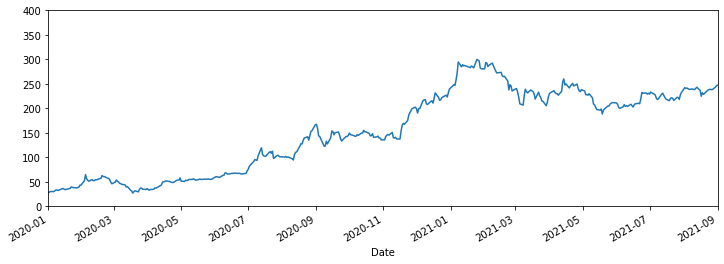

In [109]:
## x-limit and y-limit
df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=[0,400],figsize = (12,4))

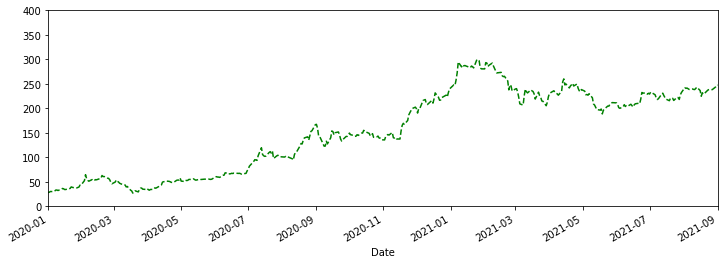

In [110]:
## x-limit and y-limit and coloring
df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=[0,400],figsize = (12,4),ls = '--',color='Green')

In [111]:
index = df_tesla.loc['2020-01-01':'2021-09-01'].index
share_open = df_tesla.loc['2020-01-01':'2021-09-01']['Open']

In [112]:
share_open

Date
2020-01-02     28.299999
2020-01-03     29.366667
2020-01-06     29.364668
2020-01-07     30.760000
2020-01-08     31.580000
                 ...    
2021-08-26    236.103333
2021-08-27    235.000000
2021-08-30    238.240005
2021-08-31    244.333328
2021-09-01    244.693329
Name: Open, Length: 421, dtype: float64

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline

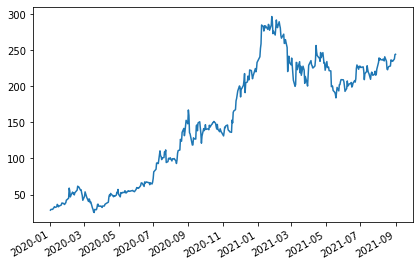

In [114]:
figure , axis  = plt.subplots()
plt.tight_layout()
## Prevent overlapping of dates
figure.autofmt_xdate()
axis.plot(index,share_open)

## DATETIME INDEX

In [115]:
# converting data time from index to a regular column
df_tesla = df_tesla.reset_index()

In [116]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   High       1259 non-null   float64       
 2   Low        1259 non-null   float64       
 3   Open       1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Volume     1259 non-null   float64       
 6   Adj Close  1259 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 69.0 KB


In [117]:
## resetting datetime as index
df_tesla = df_tesla.set_index('Date',drop=True)

In [118]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-10-16,23.632000,23.143999,23.584000,23.373333,80632500.0,23.373333
2017-10-17,23.747999,23.337999,23.393999,23.716667,49399500.0,23.716667
2017-10-18,24.200001,23.608667,23.731333,23.976667,74086500.0,23.976667
2017-10-19,23.809999,23.213333,23.704000,23.454000,75927000.0,23.454000
2017-10-20,23.636667,22.955999,23.512667,23.006666,73956000.0,23.006666


## Date time

In [119]:
from datetime import datetime

In [120]:
datetime(2021,11,21)

datetime.datetime(2021, 11, 21, 0, 0)

In [121]:
datetime.now()

datetime.datetime(2022, 10, 15, 7, 21, 16, 645890)

In [122]:
date = datetime(2021,11,21)

In [123]:
date

datetime.datetime(2021, 11, 21, 0, 0)

In [124]:
date.date()

datetime.date(2021, 11, 21)

In [125]:
date.day

21

## **Time resampling**

In [126]:
df_tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-10-16,23.632000,23.143999,23.584000,23.373333,80632500.0,23.373333
2017-10-17,23.747999,23.337999,23.393999,23.716667,49399500.0,23.716667
2017-10-18,24.200001,23.608667,23.731333,23.976667,74086500.0,23.976667
2017-10-19,23.809999,23.213333,23.704000,23.454000,75927000.0,23.454000
2017-10-20,23.636667,22.955999,23.512667,23.006666,73956000.0,23.006666
...,...,...,...,...,...,...
2022-10-10,226.990005,218.360001,223.929993,222.960007,67925000.0,222.960007
2022-10-11,225.750000,215.000000,220.949997,216.500000,77013200.0,216.500000
2022-10-12,219.300003,211.509995,215.330002,217.240005,66860700.0,217.240005


In [127]:
df_tesla.resample(rule="A").min()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,20.297333,19.508667,19.966667,19.950666,48661500.0,19.950666
2018-12-31,17.355333,16.306000,16.851999,16.704000,46210500.0,16.704000
2019-12-31,12.445333,11.799333,12.073333,11.931333,36984000.0,11.931333
2020-12-31,26.990667,23.367332,24.980000,24.081333,52073100.0,24.081333
2021-12-31,188.736664,179.830002,184.183334,187.666672,29401800.0,187.666672
2022-12-31,217.973328,204.160004,207.949997,204.990005,41864700.0,204.990005


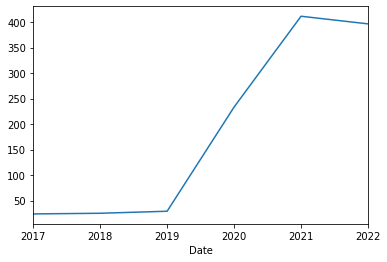

In [128]:
## rule A means year end frequency
## https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78
df_tesla.resample(rule="A").max()['Open'].plot()

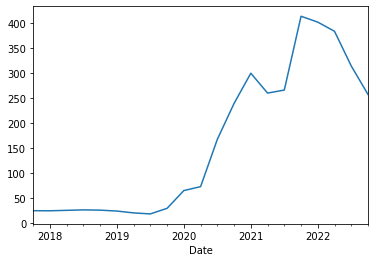

In [129]:
## quarterly start frequency
df_tesla.resample(rule="QS").max()['High'].plot()

In [130]:
## Business end frequency
df_tesla.resample(rule="BA").max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-29,24.200001,23.608667,23.731333,23.976667,296871000.0,23.976667
2018-12-31,25.830667,24.474667,25.000000,25.304667,504745500.0,25.304667
2019-12-31,29.020666,28.423332,29.000000,28.729334,450091500.0,28.729334
2020-12-31,239.573334,230.373337,233.330002,235.223328,914082000.0,235.223328
2021-12-31,414.496674,405.666656,411.470001,409.970001,268189500.0,409.970001
2022-12-30,402.666656,378.679993,396.516663,399.926666,151565700.0,399.926666


In [131]:
## Business quarters frequency
df_tesla.resample(rule="BQS").max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-10-02,24.200001,23.608667,23.731333,23.976667,296871000.0,23.976667
2018-01-01,24.033333,23.490667,24.000000,23.827999,315021000.0,23.827999
2018-04-02,24.915333,23.633333,24.344000,24.722000,335211000.0,24.722000
2018-07-02,25.830667,24.474667,24.606001,25.304667,504745500.0,25.304667
2018-10-01,25.299334,24.450001,25.000000,25.119333,411382500.0,25.119333
2019-01-01,23.466667,22.943333,23.080667,23.153999,362262000.0,23.153999
2019-04-01,19.744667,19.144667,19.219999,19.454000,398206500.0,19.454000
2019-07-01,17.738001,17.210667,17.278000,17.658667,336274500.0,17.658667
2019-10-01,29.020666,28.423332,29.000000,28.729334,450091500.0,28.729334


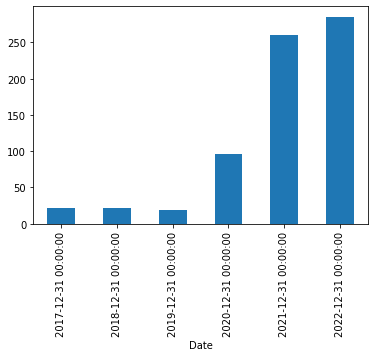

In [132]:
## plotting
df_tesla['Open'].resample(rule="A").mean().plot(kind='bar')

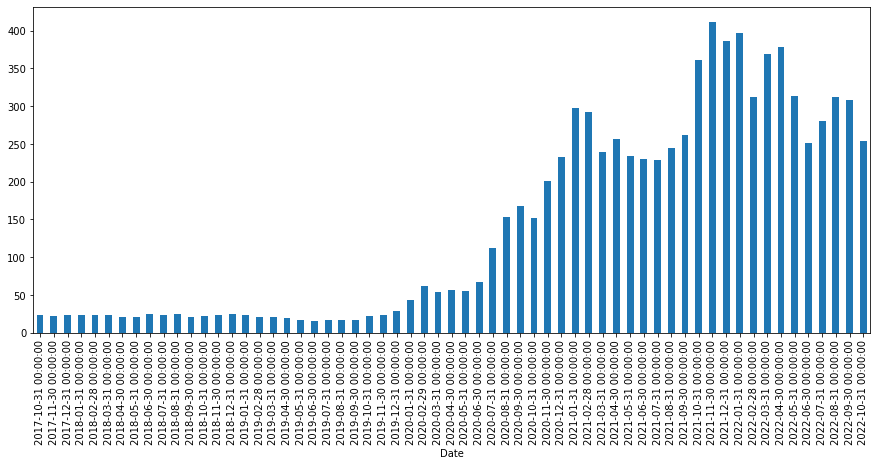

In [133]:
# rule M = month end
df_tesla['Open'].resample(rule="M").max().plot(kind='bar',figsize=(15,6))

In [134]:
df_tesla['High'].rolling(11).max().head(20)

Date
2017-10-16          NaN
2017-10-17          NaN
2017-10-18          NaN
2017-10-19          NaN
2017-10-20          NaN
2017-10-23          NaN
2017-10-24          NaN
2017-10-25          NaN
2017-10-26          NaN
2017-10-27          NaN
2017-10-30    24.200001
2017-10-31    24.200001
2017-11-01    24.200001
2017-11-02    23.809999
2017-11-03    23.636667
2017-11-06    23.330000
2017-11-07    22.853333
2017-11-08    22.500000
2017-11-09    22.174000
2017-11-10    22.174000
Name: High, dtype: float64

In [135]:
df_tesla['Open:30 days rolling'] = df_tesla['Open'].rolling(30).mean()

In [136]:
df_tesla.head(31)

,High,Low,Open,Close,Volume,Adj Close,Open:30 days rolling
Date,,,,,,,
2017-10-16,23.632000,23.143999,23.584000,23.373333,80632500.0,23.373333,NaN
2017-10-17,23.747999,23.337999,23.393999,23.716667,49399500.0,23.716667,NaN
2017-10-18,24.200001,23.608667,23.731333,23.976667,74086500.0,23.976667,NaN
2017-10-19,23.809999,23.213333,23.704000,23.454000,75927000.0,23.454000,NaN
2017-10-20,23.636667,22.955999,23.512667,23.006666,73956000.0,23.006666,NaN
2017-10-23,23.330000,22.416668,23.325333,22.468000,86209500.0,22.468000,NaN
2017-10-24,22.853333,22.410667,22.586666,22.489332,67375500.0,22.489332,NaN
2017-10-25,22.500000,21.570667,22.446667,21.722668,128911500.0,21.722668,NaN
2017-10-26,22.015333,21.546667,21.851999,21.744667,75352500.0,21.744667,NaN


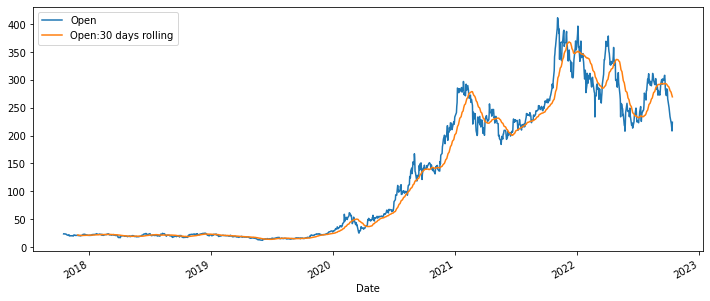

In [137]:
df_tesla[['Open','Open:30 days rolling']].plot(figsize=(12,5))

# Task : Assignment 
  1. read the microsoft data using pandas data reader
  2. get the max price of the share from 2017 to 2022
  3. which is the date of the highest price of the stock?
  4. Which is the date of the lowest price of the stock?

In [139]:
df_msft = pdr.get_data_yahoo('MSFT')

In [142]:
df_msft.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

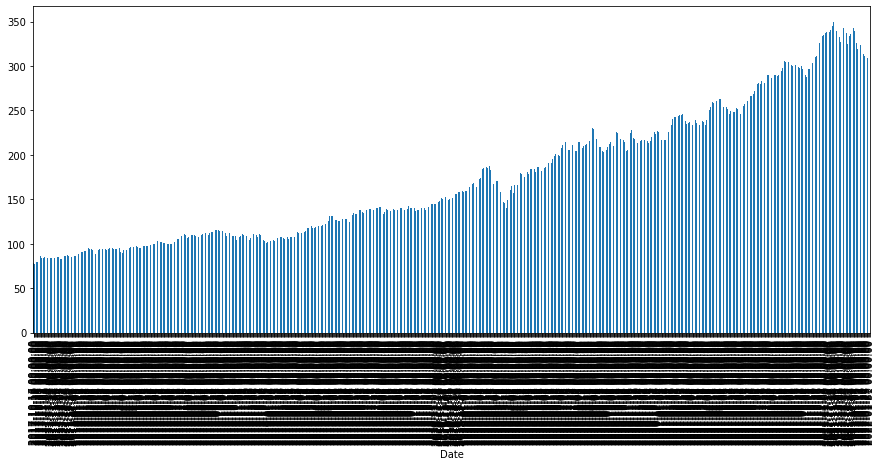

In [148]:
df_msft.loc['2017-10-16':'2022-01-31']['High'].plot(kind='bar',figsize=(15,6))

In [149]:
df_msft_data = df_msft.loc['2017-10-16':'2022-01-31']

In [155]:
df_msft_data['Open']

Date
2017-10-16     77.419998
2017-10-17     77.470001
2017-10-18     77.669998
2017-10-19     77.570000
2017-10-20     78.320000
                 ...    
2022-01-25    291.519989
2022-01-26    307.989990
2022-01-27    302.660004
2022-01-28    300.230011
2022-01-31    308.950012
Name: Open, Length: 1081, dtype: float64

In [157]:
index = df_msft_data.index
share_open = df_msft_data['Open']

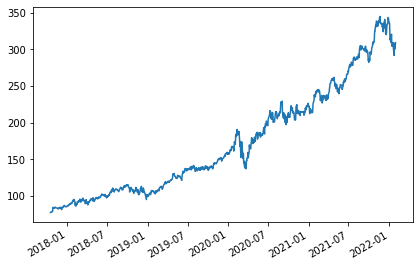

In [158]:
figure , axis  = plt.subplots()
plt.tight_layout()
## Prevent overlapping of dates
figure.autofmt_xdate()
axis.plot(index,share_open)

In [159]:
# MAX price of the microsoft share opening
share_open.max()

344.6199951171875

In [168]:
# min price of the microsoft share opening
share_open.min()

77.41999816894531

In [184]:
df_msft_data['Open'].sort_values(ascending = False)

Date
2021-11-22    344.619995
2021-12-28    343.149994
2021-11-19    342.640015
2021-12-30    341.910004
2021-12-29    341.299988
                 ...    
2017-10-20     78.320000
2017-10-18     77.669998
2017-10-19     77.570000
2017-10-17     77.470001
2017-10-16     77.419998
Name: Open, Length: 1081, dtype: float64

In [188]:
# date on which stock had max price
df_msft_data['Open'].sort_values(ascending = False).index[0]

Timestamp('2021-11-22 00:00:00')

In [189]:
# date on which stock had min price
df_msft_data['Open'].sort_values().index[0]

Timestamp('2017-10-16 00:00:00')

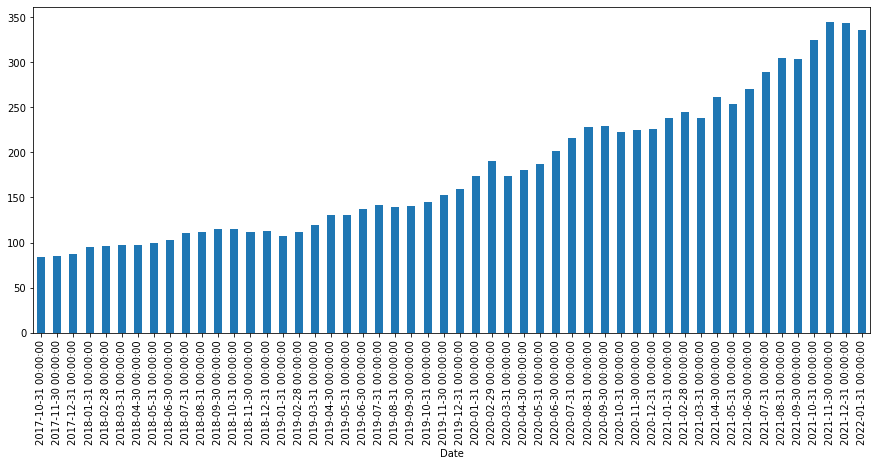

In [192]:
#month end values
df_msft_data['Open'].resample(rule="M").max().plot(kind='bar',figsize=(15,6))